In [19]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
olist_customers_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-chernik/olist_customers_dataset.csv')
olist_orders_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-chernik/olist_orders_dataset.csv')
olist_order_items_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-chernik/olist_order_items_dataset.csv')

olist_orders_dataset['order_purchase_timestamp'] = pd.to_datetime(olist_orders_dataset['order_purchase_timestamp'])
olist_orders_dataset['order_approved_at'] = pd.to_datetime(olist_orders_dataset['order_approved_at'])
olist_orders_dataset['order_delivered_carrier_date'] = pd.to_datetime(olist_orders_dataset['order_delivered_carrier_date'])
olist_orders_dataset['order_delivered_customer_date'] = pd.to_datetime(olist_orders_dataset['order_delivered_customer_date'])
olist_orders_dataset['order_estimated_delivery_date'] = pd.to_datetime(olist_orders_dataset['order_estimated_delivery_date'])
olist_order_items_dataset['shipping_limit_date'] = pd.to_datetime(olist_order_items_dataset['shipping_limit_date'])

In [26]:
olist_customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [25]:
olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [27]:
olist_order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [28]:
olist_customers_dataset.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [29]:
olist_orders_dataset.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [31]:
olist_order_items_dataset.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [32]:
olist_customers_dataset.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [33]:
olist_orders_dataset.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [35]:
olist_order_items_dataset.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [14]:
delivered_orders = olist_orders_dataset.query('order_status == "delivered"')

delivered_orders['order_id'].nunique()

96478

В исследовании покупкой будем считать только те заказы, у которых статус "delivered" (доставлен пользователю), так как это указывает на фактическую доставку товара покупателю. Соответственно мы имеем 96478 покупок.

# 1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [25]:
# Объединение датафреймов по столбцу order_id
merged_df =  olist_customers_dataset.merge(olist_orders_dataset, on='customer_id')

# Фильтрация заказов по статусу "delivered", группировка по уникальному идентификатору пользователя
#и подсчет количества уникальных заказов этих пользователей
order_counts = merged_df.query('order_status == "delivered"') \
    .groupby('customer_unique_id')['order_id'].nunique()

# Отбор пользователей у которых только один заказ
users_with_one_order = order_counts[order_counts == 1]

# Подсчёт числа элементов в списке при помощи функции len
count_users_with_one_order = len(users_with_one_order)

print("Количество пользователей, которые совершили покупку только один раз:", count_users_with_one_order)

Количество пользователей, которые совершили покупку только один раз: 90557


# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [87]:
# Создание колонки с месяцем
olist_orders_dataset['order_month'] = olist_orders_dataset['order_purchase_timestamp'].dt.to_period('M')

# Отбор заказов с недоставленным статусом
not_delivery_orders = olist_orders_dataset.query('order_status == ["unavailable", "canceled"]')
not_delivery_canceled_orders = olist_orders_dataset.query('order_status == "canceled"')
not_delivery_unavailable_orders = olist_orders_dataset.query('order_status == "unavailable"')

# Расчёт средного количества недоставленных заказов в месяц
avg_not_delivery_orders = not_delivery_orders.groupby('order_month').agg({'order_month': 'count'}).mean().round(0)
avg_not_delivery_canceled_orders = not_delivery_canceled_orders.groupby('order_month').agg({'order_month': 'count'}).mean().round(0)
avg_not_delivery_unavailable_orders = not_delivery_unavailable_orders.groupby('order_month').agg({'order_month': 'count'}).mean().round(0)

print("Среднее количество не доставленных заказов в месяц:", avg_not_delivery_orders)
print("Среднее количество не доставленных заказов в месяц по причиние 'canceled':", avg_not_delivery_canceled_orders)
print("Среднее количество не доставленных заказов в месяц по причиние 'unavailable':", avg_not_delivery_unavailable_orders)

Среднее количество не доставленных заказов в месяц: order_month    51.0
dtype: float64
Среднее количество не доставленных заказов в месяц по причиние 'canceled': order_month    26.0
dtype: float64
Среднее количество не доставленных заказов в месяц по причиние 'unavailable': order_month    29.0
dtype: float64


# 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [12]:
# Объединение датафреймов по столбцу order_id
olist_orders_items_dataset = olist_orders_dataset.merge(olist_order_items_dataset, on='order_id')

# Создание столбца с днём
olist_orders_items_dataset['order_day'] = olist_orders_dataset['order_purchase_timestamp'].dt.day_name()

# Группировка по id товара, дню недели и подсчёт количества покупок
orders_items_days = olist_orders_items_dataset.groupby(['product_id', 'order_day']) \
    .size().reset_index(name='order_count')

# Отбор наиболее частого дня недели для каждого товара
most_order_day = orders_items_days.groupby(['product_id', 'order_day'])['order_count'].idxmax()
result = orders_items_days.loc[most_order_day].sort_values('order_count', ascending=False)

result.head(10)

,product_id,order_day,order_count
39785,aca2eb7d00ea1a7b8ebd4e68314663af,Monday,81
15366,422879e10f46682990de24d770e7f83d,Monday,79
35349,99a4788cb24856965c36a24e339b6058,Tuesday,75
35345,99a4788cb24856965c36a24e339b6058,Monday,74
35348,99a4788cb24856965c36a24e339b6058,Thursday,74
35344,99a4788cb24856965c36a24e339b6058,Friday,71
39790,aca2eb7d00ea1a7b8ebd4e68314663af,Wednesday,70
39786,aca2eb7d00ea1a7b8ebd4e68314663af,Saturday,69
15370,422879e10f46682990de24d770e7f83d,Tuesday,67
39789,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,67


# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

In [15]:
# Фильтрация заказов по статусу "delivered"
delivered_orders = olist_orders_dataset.query('order_status == "delivered"')

# Объединение датафреймов по столбцу customer_id
merged_df =  olist_customers_dataset.merge(delivered_orders, on='customer_id')

# Создание колонки с неделей и месяцем
merged_df['week_period'] = merged_df['order_purchase_timestamp'].dt.to_period('W')
merged_df['month'] = merged_df['order_purchase_timestamp'].dt.to_period('M')

# Расчёт количества недель в каждом месяце
week_per_month = merged_df.groupby('month', as_index=False)['week_period'].nunique()

# Группировка данных по id клиента, неделе, месяцу и расчёт количества заказов для каждой недели
orders_per_week = merged_df.groupby(['customer_id', 'week_period', 'month'], as_index=False) \
    .agg({'order_id': 'count'})

# Объединение данных с количеством недель в каждом месяце
orders_per_week = orders_per_week.merge(week_per_month, on='month')

# Расчёт среднего количества заказов в месяц путём произведения количества заказов и недель в каждом месяце
orders_per_week['avg_orders_per_week'] = orders_per_week['order_id'] / orders_per_week['week_period_y']

orders_per_week[['customer_id', 'month', 'avg_orders_per_week']]

,customer_id,month,avg_orders_per_week
0,00012a2ce6f8dcda20d059ce98491703,2017-11,0.2
1,000f17e290c26b28549908a04cfe36c1,2017-11,0.2
2,002937abdae13680e17dccd3868b4825,2017-11,0.2
3,002c625393dfa194828b462a6ef8cb0b,2017-11,0.2
4,002fb8fc5ce64f8422fa2fe79986c783,2017-11,0.2
...,...,...,...
96473,fd997caf29864e0b5e0d328a2d163e3f,2016-10,0.5
96474,ff1a56726b7ea149c7423865609cc0c8,2016-10,0.5
96475,ff4dfb2525a749384a0e31d68625443a,2016-10,0.5
96476,0975c3cf2e418ebfa5d1191a2dffd59d,2016-12,1.0


# 5. Когортный анализ пользователей. Период с января по декабрь. Когорта с самым высоким retention на 3й месяц. 

In [36]:
# Фильтрация заказов по статусу "delivered"
delivered_orders = olist_orders_dataset.query('order_status == "delivered"')

# Объединение датафреймов по столбцу customer_id
merged_df =  olist_customers_dataset.merge(delivered_orders, on='customer_id')

# Создание столбца c месяцем первой покупки для каждого клиента
merged_df['first_purchase_month'] = merged_df.groupby('customer_unique_id') \
    ['order_purchase_timestamp'].transform('min').dt.to_period('M')

# Фильтрация данных по месяцу первой покупки в период с января по декабрь 2017 года
merged_df = merged_df.loc[merged_df['first_purchase_month'].between('2017-01', '2017-12')]
merged_df = merged_df.loc[merged_df['order_purchase_timestamp'].between('2017-01', '2017-12')]

# Добавление столбца с месяцем покупки
merged_df['purchase_month'] = merged_df['order_purchase_timestamp'].dt.to_period('M')

# Расчет количества уникальных клиентов по когортам и месяцам
cohort_df = merged_df.groupby(['first_purchase_month', 'purchase_month'])['customer_unique_id'].nunique().reset_index()

# Добавление столбца с количеством месяцев между первой и последней покупкой
cohort_df['retention_month'] = (cohort_df['purchase_month'] - cohort_df['first_purchase_month']).apply(lambda x: x.n)

# Создание таблицы retention с помощью pivot_table
retention = cohort_df.pivot_table(index='first_purchase_month', columns='retention_month', values='customer_unique_id')

# Выбираем первый столбец в таблице
cohort_sizes = retention.iloc[:, 0]

# Деление значений из таблицы retention_table на cohort_sizes для получения доли
retention_pct = retention.div(cohort_sizes, axis=0) * 100

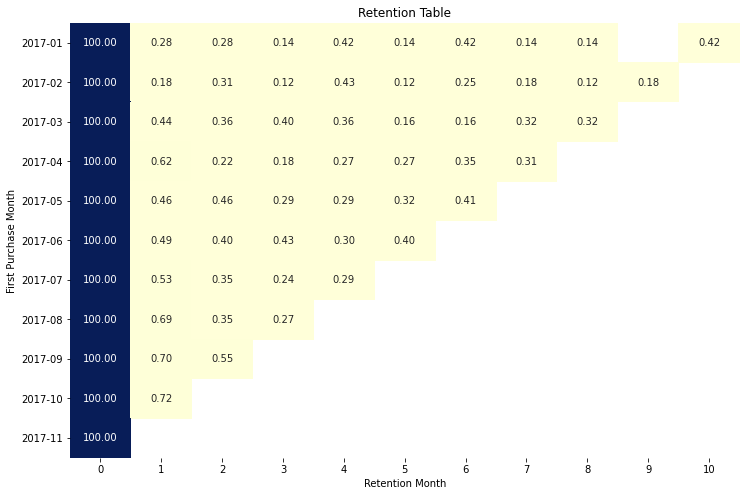

In [40]:
# Визуализация таблицы с помощью тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(retention_pct, annot=True, fmt='.2f', cmap='YlGnBu', cbar=False)
plt.title('Retention Table')
plt.xlabel('Retention Month')
plt.ylabel('First Purchase Month')
plt.show()

Когорта с самым высоким retention на 3-й месяц: это те клиенты, которые совершили свою первую покупку в июне

# 6. RFM-сегментацию пользователей

In [7]:
# Объединение датафреймов по столбцу customer_id, а затем по order_id
merged_df =  olist_customers_dataset.merge(olist_orders_dataset, on='customer_id')
merged_df =  merged_df.merge(olist_order_items_dataset, on='order_id')

In [8]:
# Определяем временные рамки данных
print('Orders from {} to {}'.format(merged_df['order_delivered_customer_date'].min(),
                                    merged_df['order_delivered_customer_date'].max()))

Orders from 2016-10-11 13:46:32 to 2018-10-17 13:22:46


In [9]:
# Рассчитываем общую стоимость каждой строки
merged_df['total_price'] = merged_df['order_item_id'] * merged_df['price']

In [10]:
merged_df['order_id'].value_counts().head()

8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
Name: order_id, dtype: int64

In [11]:
# Создаём датафрейм orders, который агрегиррует стоимость по каждому заказу
orders = merged_df.groupby(['order_id', 'order_delivered_customer_date', 'customer_unique_id']) \
    .agg({'total_price': lambda x: x.sum()}).reset_index()
orders.head()

,order_id,order_delivered_customer_date,customer_unique_id,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,58.90
1,00018f77f2f0320c557190d7a144bdd3,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,239.90
2,000229ec398224ef6ca0657da4fc703e,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,199.00
3,00024acbcdf0a6daa1e931b038114c75,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,199.90


In [12]:
# Фильтрация данных по периоду с января по декабрь 2017 года
orders = orders.loc[orders['order_delivered_customer_date'].between('2017-01', '2017-12')]

In [13]:
# Для расчета оценки Recency установим переменную NOW обозначающая следующий день после последней покупки
NOW = orders['order_delivered_customer_date'].max() + timedelta(days=1)
NOW

Timestamp('2017-12-01 23:59:03')

In [14]:
# Установим переменную период в 365 дней, так как будем изучать данные за год
period = 365

In [15]:
# Добавим столбец с разницей дней между "сейчас" и покупкой 
orders['days_since_order'] = orders['order_delivered_customer_date'].apply(lambda x: (NOW - x).days)

In [16]:
# Создадим новый датафрейм и расчитаем кол-во дней с последнего заказа (recency)
#и общее количество заказов за последний период (frequency)
aggr = {
    'days_since_order': lambda x: x.min(),  
    'order_delivered_customer_date': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]),
}
rfm = orders.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'days_since_order': 'recency', 'order_delivered_customer_date': 'frequency'}, inplace=True)
rfm.head()

,customer_unique_id,recency,frequency
0,0000f46a3911fa3c0805444483337064,240,1
1,0000f6ccb0745a6a4b88665a16c9f078,30,1
2,0004aac84e0df4da2b147fca70cf8255,4,1
3,0005e1862207bf6ccc02e4228effd9a0,267,1
4,0006fdc98a402fceb4eb0ee528f6a8d4,120,1


In [17]:
# Добавим сумму продаж по клиенту за период
#отфильтруем клиентов по значению х, оставим только те строки, где значение даты покупки более или равно последнему периоду
#вычислим сумму значений по каждому заказу после фильтрации
rfm['monetary'] = rfm['customer_unique_id'].apply(lambda x: orders[(orders['customer_unique_id'] == x) & \
                                                           (orders['order_delivered_customer_date'] >= NOW - timedelta(days=period))]\
                                                           ['total_price'].sum())
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000f46a3911fa3c0805444483337064,240,1,69.00
1,0000f6ccb0745a6a4b88665a16c9f078,30,1,25.99
2,0004aac84e0df4da2b147fca70cf8255,4,1,180.00
3,0005e1862207bf6ccc02e4228effd9a0,267,1,135.00
4,0006fdc98a402fceb4eb0ee528f6a8d4,120,1,13.90


Расчёт оценки R, F, M

In [31]:
# Создадим словарь quintiles, который содержит квантили (25%, 50%, 75%) для каждого из трех столбцов
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.25, .5, .75]).to_dict()
quintiles

{'recency': {0.25: 56.0, 0.5: 119.0, 0.75: 192.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary': {0.25: 48.9, 0.5: 89.9, 0.75: 167.0}}

In [19]:
# Создадим функцию для присвоения рангов от 1 до 3 на основании словаря quintiles

def r_score(x):
    if x <= quintiles['recency'][.25]:
        return 3
    elif x <= quintiles['recency'][.5]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.25]:
        return 3
    elif x <= quintiles[c][.5]:
        return 2
    else:
        return 1

In [20]:
# Добавим столбцы с оценками с датафрейм при помощи функции
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [21]:
# Создаём RFM-сегменты, при помощи метода .map(str) преобразуем в строковый формат
rfm['RFM_score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score
0,0000f46a3911fa3c0805444483337064,240,1,69.00,1,3,2,132
1,0000f6ccb0745a6a4b88665a16c9f078,30,1,25.99,3,3,3,333
2,0004aac84e0df4da2b147fca70cf8255,4,1,180.00,3,3,1,331
3,0005e1862207bf6ccc02e4228effd9a0,267,1,135.00,1,3,1,131
4,0006fdc98a402fceb4eb0ee528f6a8d4,120,1,13.90,1,3,3,133


In [26]:
# Создадим словарь segt_map, где ключами укажем значения сегментов
# Добавим столбец segment заменив на значения из словаря segt_map по ключам
segt_map = {
    r'111': 'Lost Economical',
    r'112': 'One-time',
    r'113': 'One-time',
    r'121|122|123': 'Churning Rare',
    r'131': 'Churning Persistent',
    r'132': 'Churning Good Persistent',
    r'133': 'Churning VIP',
    r'211': 'Sleeping One-time Low Spend',
    r'212|213': 'Sleeping One-time Low Spend',
    r'221': 'Sleeping Rare Low Spend',
    r'222': 'Sleeping Rare Medium Spend',
    r'223': 'Sleeping Rare High Spend',
    r'231': 'Sleeping Persistent Low Spend',
    r'232': 'Sleeping Persistent Medium Spend',
    r'233': 'Sleeping Persistent High Spend',
    r'311': 'Newcomers Low Spend',
    r'312': 'Newcomers Medium Spend',
    r'313': 'Newcomers High Spend Potential VIP',
    r'321': 'Persistent Low Spend',
    r'322': 'Persistent Medium Spend',
    r'323': 'Persistent High Spend',
    r'331': 'Persistent Low Spend',
    r'332': 'Persistent Medium Spend',
    r'333': 'VIP'
}

rfm['segment'] = rfm['RFM_score'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score,segment
0,0000f46a3911fa3c0805444483337064,240,1,69.00,1,3,2,132,Churning Good Persistent
1,0000f6ccb0745a6a4b88665a16c9f078,30,1,25.99,3,3,3,333,VIP
2,0004aac84e0df4da2b147fca70cf8255,4,1,180.00,3,3,1,331,Persistent Low Spend
3,0005e1862207bf6ccc02e4228effd9a0,267,1,135.00,1,3,1,131,Churning Persistent
4,0006fdc98a402fceb4eb0ee528f6a8d4,120,1,13.90,1,3,3,133,Churning VIP


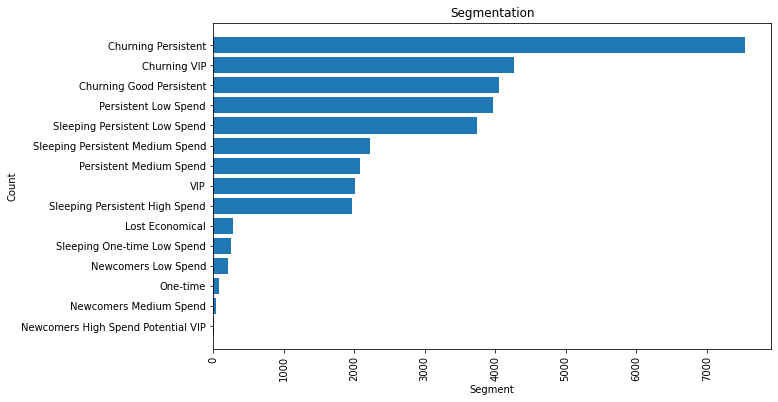

In [52]:
# Подсчитаем количество клиентов в каждом сегменте
segment_counts = rfm['segment'].value_counts(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(segment_counts.index, segment_counts.values)
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Segmentation')
plt.xticks(rotation=90)
plt.show()

На гистограмме выше мы видими визуализацию аудитории

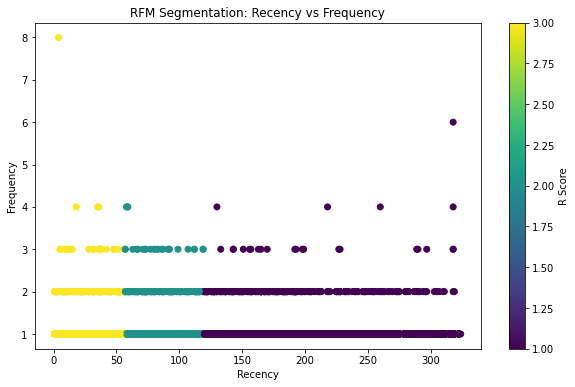

In [51]:
# Посмотрим распределения клиентов по значениям recency и frequency
plt.figure(figsize=(10, 6))
plt.scatter(rfm['recency'], rfm['frequency'], c=rfm['R'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Segmentation: Recency vs Frequency')
plt.colorbar(label='R Score')
plt.show()

На графике выше отображение значений R для визуализации от последней покупки пользователя в 2017 году до текущей даты. Мы видим, что подавляющее количество пользователей совершило последнюю покупку более 150 дней назад.

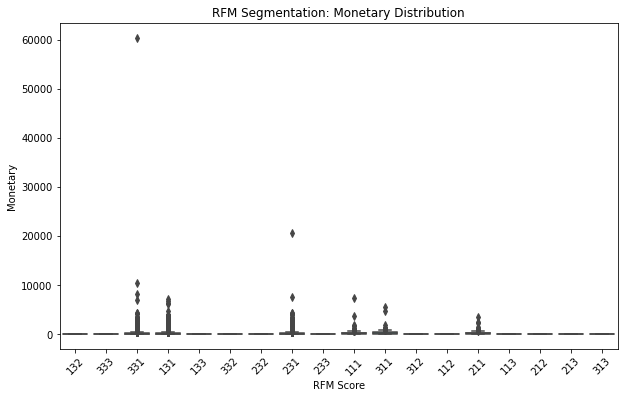

In [62]:
# Построим боксплот для распределения значений monetary для RFM score
plt.figure(figsize=(10, 6))
sns.boxplot(x=rfm['RFM_score'], y=rfm['monetary'])
plt.xlabel('RFM Score')
plt.ylabel('Monetary')
plt.title('RFM Segmentation: Monetary Distribution')
plt.xticks(rotation=45)
plt.show()

На боксплоте выше отображены суммы покупок по сегментам пользователей